<a href="https://colab.research.google.com/github/alina-bogdanovskaya/Math_Sep2021/blob/lesson5/Probability%2C_combinatorics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import itertools 
from termcolor import colored 
from scipy.stats import pearsonr

In [ ]:
#Roulette
red_list = [1, 3, 5, 7, 9, 12, 14, 16, 18, 19, 21, 23, 25, 27, 30, 32, 34, 36]
black_list = [2, 4, 6, 8, 10, 11, 13, 15, 17, 20, 22, 24, 26, 28, 29, 31, 33, 35]

for i in range(0, 10):
  a = input()
  num = np.random.randint(0, 37)
  if num == 0:
    print(colored('zero', 'white', 'on_green'))
  elif num in red_list:
    print(colored(f'{num} red', 'white', 'on_red'))
  else: 
    print(colored(f'{num} black', 'white', 'on_grey'))

In [21]:
#d6, P(A+B) = P(A)+P(B)
k, l, m, n = 0, 0, 0, 10000

for i in range(n+1):
  a = np.random.randint(1, 7, 1) 
  if a == 5 or a == 6:
    k += 1
  if a == 5:
    l += 1
  if a == 6:
    m += 1

print(f'{k} of {n}, {k/n}')
print(f'{l + m} of {n}, {(l+m)/n}')

if k == l+m:
  print(True)
else:
  print(False)

3370 of 10000, 0.337
3370 of 10000, 0.337
True


[4.764730398982791, 3.165526997113922, 5.168596517203797, 5.573385257688803, 5.197507556969169, 5.311957981207267, 3.8126384004451457, 4.010208936501637, 5.448376470394565, 4.8139164876841365]


Text(0.5, 1.0, 'Sum Histrogram')

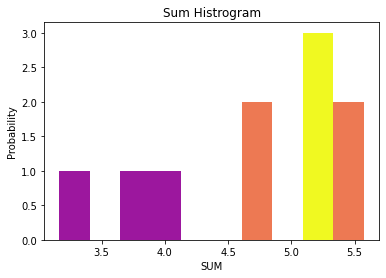

In [22]:
#Histogram
n, m = 10, 10
a_list = []

for i in range(1, n + 1):
  x = np.random.rand(m)
  res = np.sum(x)
  a_list.append(res)
  
print(a_list)

n, bins, patches = plt.hist(a_list, bins = 10)
for i in range(len(patches)):
    patches[i].set_facecolor(plt.cm.plasma(n[i]/max(n)))

plt.xlabel('SUM')
plt.ylabel('Probability')
plt.title('Sum Histrogram')

In [23]:
def fact(n):
  factor = 1
  for el in range(1, n + 1):
    factor *= el
  return factor

def binomial_distr(n, k):
  index = fact(n) / (fact(k) * fact(n - k))
  res = index * p**k * q**(n - k)
  return res

In [24]:
# Monte-Carlo
k, n = 0, 10000
a = np.random.randint(0, 2, n)
b = np.random.randint(0, 2, n)
c = np.random.randint(0, 2, n)
d = np.random.randint(0, 2, n)
x = a + b + c + d

for i in range(0, n):
  if x[i] == 1:
    k = k + 1

print(f'{k} of {n}') 
print(f'Monte-Carlo method {k/n}')

# Bernoulli 
k, n = 1, 4
p = 1/2
q = 1 - p

print(f'Bernoulli distribution {binomial_distr(n, k)}')

2495 of 10000
Monte-Carlo method 0.2495
Bernoulli distribution 0.25


In [25]:
# Monte-Carlo
k, n = 0, 10000
res_list = []

for el in range(6):  
  a = np.random.randint(1, 7, n)
  res_list.append(a)

for el in zip(*res_list):
  if el.count(6) == 3:
    k += 1

print(f'{k} of {n}') 
print(f'Monte-Carlo method {k/n}')

# Bernoulli 
k, n = 3, 6
p = 1/6
q = 1 - p

print(f'Bernoulli distribution {binomial_distr(n, k)}')

530 of 10000
Monte-Carlo method 0.053
Bernoulli distribution 0.05358367626886146


In [26]:
n, k = 3, 3

for p in itertools.permutations('012', k):
  print(''.join(str(x) for x in p))

index = fact(n)
print(index)

012
021
102
120
201
210
6


In [27]:
n, k = 5, 3

for p in itertools.combinations('12345', k):
  print(''.join(p))

index = fact(n) / (fact(k) * fact(n - k))
print(index)

123
124
125
134
135
145
234
235
245
345
10.0


In [28]:
n, k = 4, 2

for p in itertools.combinations_with_replacement('abcd', 2):
  print(''.join(p))

index = fact(n+k-1) / (fact(k) * fact(n - 1))
print(index)

aa
ab
ac
ad
bb
bc
bd
cc
cd
dd
10.0


0.7620650961961117 0.12611617216129686
0.7620650961961134 0.12611617216129614
0.9383525917756521
[[1.         0.93835259]
 [0.93835259 1.        ]]
(0.9383525917756521, 5.275919304648182e-47)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


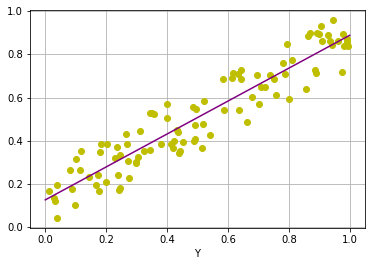

In [29]:
n = 100
r = 0.7

x = np.random.rand(n)
y = r * x + (1 - r) * np.random.rand(n)
plt.plot(x, y, 'yo')
plt.xlabel('X')
plt.xlabel('Y')
plt.grid(True)

a = (np.sum(x) * np.sum(y) - n * np.sum(x * y)) / (np.sum(x)**2 - n * np.sum(x**2))
b = (np.sum(y) - a * np.sum(x)) / n

mean_x = np.sum(x)/n
mean_y = np.sum(y)/n
s1, s2, s3 = 0, 0, 0

for (i, j) in zip(x, y):
  k = i - mean_x 
  l = j - mean_y
  s1 += (k*l)
  s2 += k**2
  s3 += l**2

c = s1 / np.sqrt(s2 * s3)

A = np.vstack([x, np.ones(len(x))]).T
a1, b1 = np.linalg.lstsq(A, y)[0]
c1 = np.corrcoef(x, y)
c2 = pearsonr(x, y)

print(a, b)
print(a1, b1)
print(c)
print(c1)
print(c2)

plt.plot([0, 1], [b, a + b], 'purple')